In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random, randint
import time
from IPython import display
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import random, randint
import unittest

# Chaos

It is nice when I have an opportunity to bring my interdisciplinary interests together. I first learned the second of these demos (what I call the chaotic love triangle) in a dance class, but it draws on my background in computational physics to simulate the motion of particles. I also presented this notebook to a theology class that was discussing the metaphysics of agency as part of my work as a research assistant. 


A **chaotic system** is one in which very small changes in initial conditions lead to large differences in how the system evolves. Here is a simple example. 


## Example #1: Population Growth

Let xi be an initial population size, x[n+1] is next year's population, x[n] how many of the species are going to breed this year, (1-x[n]) represents compettion for resources if the population gets too big. K represents the coupling of these effects in the previous season to the present year. 
#### See Polkinghorne, J C. “The Nature of Physical Reality.” Zygon 35, no. 4 (December 2000): 927–40.


In [2]:
def modelPopSize(k,xi,n):
    x=xi*np.ones((n,1))
    for n in range(n-1):
        x[n+1]=k*x[n]*(1-x[n])
    return x

def plotPopSize(k,x1,x2,xi1,xi2):
    ax1=plt.subplot(1,2,1, title="K = {}, xi = {}".format(k,xi1),xlabel="Years",ylabel="PopSize")
    ax2=plt.subplot(1,2,2, title="K = {}, xi = {}".format(k,xi2),xlabel="Years",ylabel="PopSize")
    ax1.plot(x1)
    ax2.plot(x2)



### Population decay (K < 1)

* Not sensitive to initial conditions (left figure looks the same as the right)


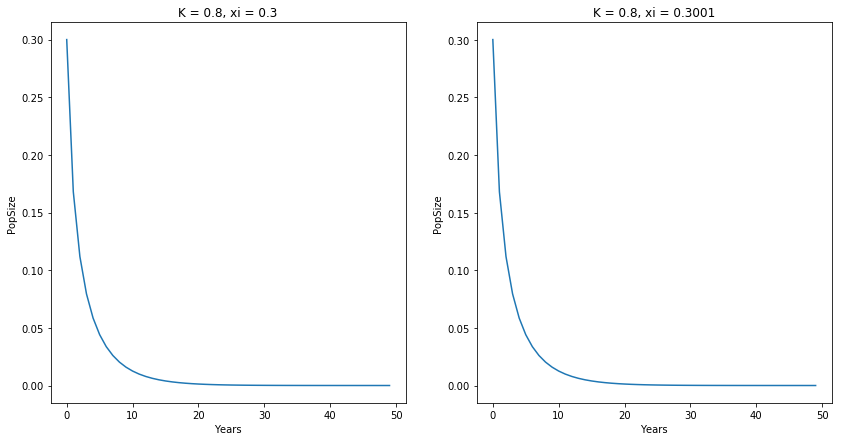

In [3]:
k=0.8
n=50
xi1=0.3
xi2=0.3001
plt.rcParams['figure.figsize'] = (14, 7)

x1=modelPopSize(k,xi1,n)
x2=modelPopSize(k,xi2,n)
plotPopSize(k,x1,x2,xi1,xi2)

### Stable population (K = 2)

* Not sensitive to initial conditions (left figure looks the same as the right)

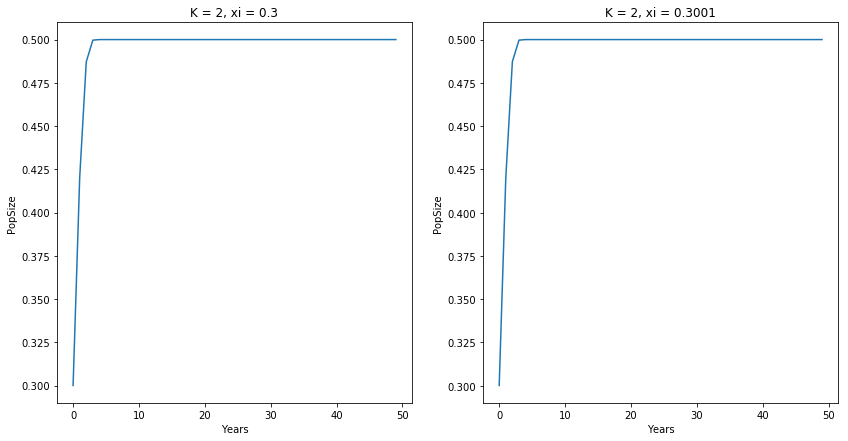

In [4]:
k=2
n=50
xi1=0.3
xi2=0.3001
x1=modelPopSize(k,xi1,n)
x2=modelPopSize(k,xi2,n)
plotPopSize(k,x1,x2,xi1,xi2)

### Bifurcation (K = 3.2)

* Oscillates between two stable population sizes
* Not sensitive to initial conditions (left figure looks the same as the right)

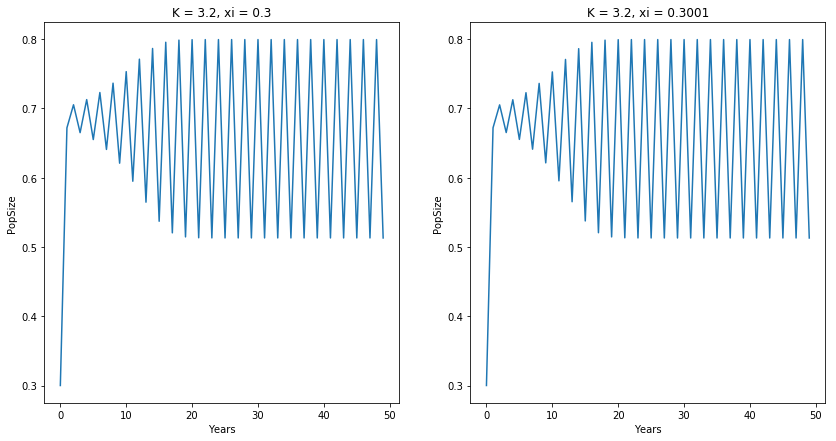

In [5]:
k=3.2
n=50
xi1=0.3
xi2=0.3001
x1=modelPopSize(k,xi1,n)
x2=modelPopSize(k,xi2,n)
plotPopSize(k,x1,x2,xi1,xi2)

### Fourfold Oscillation (K = 3.5)

* Not sensitive to initial conditions (left figure looks the same as the right)

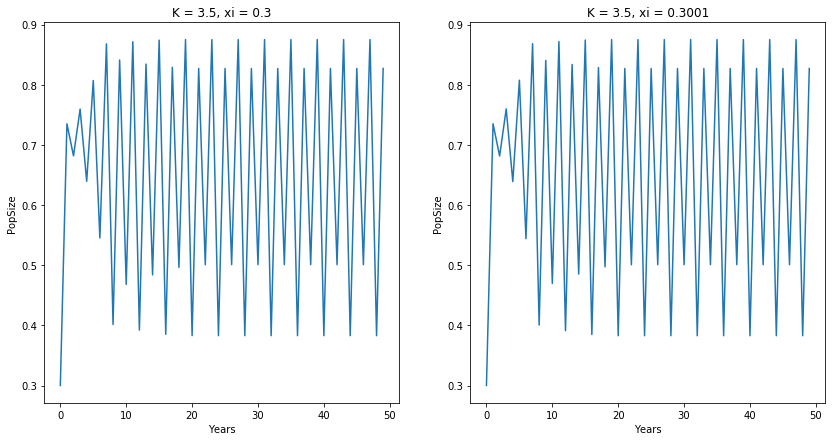

In [6]:
k=3.5
n=50
xi1=0.3
xi2=0.3001
x1=modelPopSize(k,xi1,n)
x2=modelPopSize(k,xi2,n)
plotPopSize(k,x1,x2,xi1,xi2)

### Chaotic Regime (K > 3.58)

* Very sensitive to initial conditions (compare left figure to right)

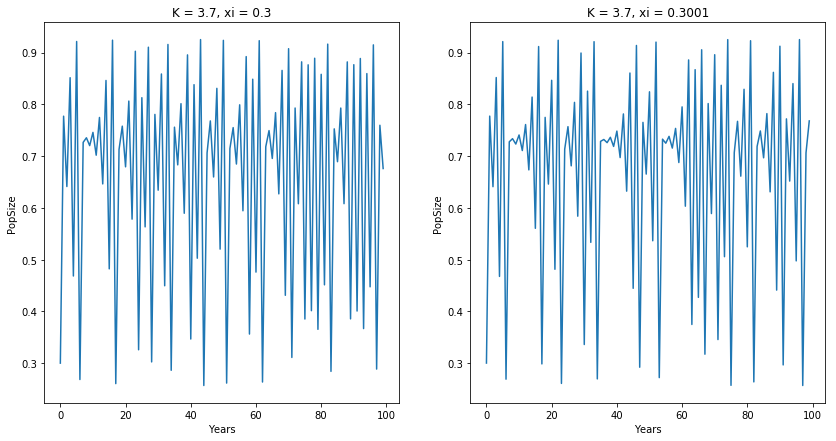

In [7]:
k=3.7
n=100
xi1=0.3
xi2=0.3001
x1=modelPopSize(k,xi1,n)
x2=modelPopSize(k,xi2,n)
plotPopSize(k,x1,x2,xi1,xi2)
#ax1=plt.subplot(1,1,1, title="K = {}, xi = {}".format(k,xi1),xlabel="Years",ylabel="PopSize")
#ax2=plt.subplot(2,1,2, title="K = {}, xi = {}".format(k,xi2),xlabel="Years",ylabel="PopSize")
#ax1.plot(x1)
#ax2.plot(x2)

## Example #2: The Chaotic Love Triangles

In this icebreaker game, each person/agent selects two other people to track throughout the game. Without saying who, they attempt to create an equilateral triangle with these two people. Everyone starts at random positions in the room, and the game progresses as people move to achieve their objective. 

This is a **chaotic system** because small changes in initial conditions or perturbations of the system can lead to very different histories and final outcomes of the system (such as whether the system **converges** or not). 

### Version 1: Agents hop directly to their desired positions (no travel time)

* This is the first prototype because it does not require any vector projections to define smaller motions toward desired points. Instead, you merely identify the desired points and move directly there on the next iteration. This means that the system always has large dynamical changes and so it is unlikely to settle down.


* The desired points are the **two possible vertices** that would create an equilateral triangle between the agent and her attractors. However, it is possible/likely that one or both of these points will lie outside the bounds of the room. 


* **Algorithm**: Out of the points that would form an equilateral triangle with the agent and her attractors that also lie **in bounds**, use the one **closest** to the agent's present position to update her position on the next iteration. If neither lies in bounds, then the agent **doesn't move** at this iteration.

In [ ]:
# This has to be 'notebook' or else the dynamic plot update won't work within the notebook
%matplotlib notebook
    
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

In [10]:
class Simulator:
    eps = 1e-16

    def __init(self, num_agents = 15, max_iterations = 1000, convergence_tol = 0.001, x_bounds = (0,1), y_bounds = (0, 1)):
        
        # convergence_tol : % of dimensions of the room
        self.convergence_tol = convergence_tol
        
        # Dimensions of the room
        self.x_bounds = x_bounds
        self.y_bounds = y_bounds
    
        self.num_agents = num_agents
        self.max_iterations = max_iterations
        
        self.iteration = 0
        self.converged_at_iteration = None
        self.mean_step = []
        
        self.__initialize_positions()
        
        self.__choose_attractors()
        
        
    def __find_third_vertex(self, first_vertex, second_vertex):

        """ Returns both possible options for the third vertex that makes an equilateral triangle with two given points"""

        # Midpoint:
        mid_x, mid_y = 0.5*(first_vertex[0] + second_vertex[0]), 0.5*(first_vertex[1] + second_vertex[1])

        # Squared length of side of equilateral triangle:
        D2 = (first_vertex[0] - second_vertex[0])**2 + (first_vertex[1] - second_vertex[1])**2

        y_diff = first_vertex[1] - second_vertex[1]

        if y_diff < eps:
            # avoid division by zero
            y_diff += eps

        # Negative Reciprocal slope of line joining first and second vertex:
        slope = -(first_vertex[0] - second_vertex[0]) / y_diff

        # Intercept of perpendicular bisector line between first and second vertex:
        intercept = mid_y - slope * mid_x

        # For the quadratic formula:
        A = 1
        B = -2 * mid_x
        C = mid_x**2 - (3/4) * D2 /(slope**2 + 1)

        Rx = np.roots([A, B, C])
        Ry = slope*Rx + intercept

        vertex_options = (Rx, Ry)
        
        return vertex_options

    def __initialize_positions(self):
        
        # Container for the whole simulation:
        self.X = np.zeros((self.num_agents, self.num_iterations + 1))
        self.Y = np.zeros((self.num_agents, self.num_iterations + 1))

        # Initialize first positions:
        self.X[:,0] = np.random.rand(self.num_agents,)
        self.Y[:,0] = np.random.rand(self.num_agents,)

    def __choose_attractors(self):
        if self.num_agents < 3:
            raise Exception('The number of agents must be at least 3')

        # Populate the options for each agent to follow, anyone but herself
        options = np.arange(self.num_agents)
        options = np.tile(options,(len(options),1))
        options = options[~np.eye(options.shape[0],dtype=bool)].reshape(options.shape[0],-1)

        # Pick two random indices to options for two people to follow
        # (scale the random number by the range and round.)

        # Actually will need to loop here for the second person because have to make sure not 
        # choosing same two people:

        # Initialize
        follows = np.zeros((self.num_agents, 2))
        
        # First attractor:
        follows[:, 0, np.newaxis] = np.round( (options.shape[1] - 1) * np.random.rand(num_agents, 1) ).astype(int)

        # Second attractor:
        for agent in range(self.num_agents):
            firstDraw = follows[agent,0]
            
            # Initialize:
            secondDraw = firstDraw
            while secondDraw == firstDraw:
                # Want a different random draw from the options
                secondDraw = np.round( (options.shape[1] - 1) * np.random.rand() ).astype(int)
            follows[agent,1] = secondDraw
            
        follows=follows.astype(int)  

        self.first_attractor = options[np.arange(options.shape[0]), follows[:,0], np.newaxis]
        self.second_attractor = options[np.arange(options.shape[0]), follows[:,1], np.newaxis] 

    def __update_positions(self):
        """
        This allows each agent to jump directly to the third vertex that would create an equilateral triangle
        with the agent and the agent's two targets. However, everyone is jumping at the same time so these 
        triangles are not likely to be formed until later in the simulation (if ever)
        """
        for agent in range(self.X.shape[0]):

            # Find the points where you want to go to complete the triangle
            first_vertex = (self.X.item((self.first_attracotr.item(agent), self.iteration)), \
               self.Y.item(self.first_attractor.item(agent), self.iteration))
            second_vertex = (self.X.item((self.second_attractor.item(agent), self.iteration)), \
               self.Y.item(self.second_attractor.item(agent), self.iteration))

            options_x, options_y = find_third_vertex(first_vertex, second_vertex)

            # Find the closest of the two vertices to your current position, or the one that is inside the room:
            # For now, just don't update position if both are out of bounds

            out_of_bounds = (options_x > self.x_bounds[1]) | (options_x < self.x_bounds[0]) | \
                            (options_y > self.y_bounds[1]) | (options_y < self.y_bounds[0])

            options_x = options_x[~out_of_bounds]
            options_y = options_y[~out_of_bounds]

            # Update the next position
            if len(options_x) > 1:
                D1 = ( (options_x[0] - self.X[agent, self.iteration])**2 + \
                     (options_y[0] - self.Y[agent, self.iteration])**2 )**0.5
                D2 = ( (options_x[1] - self.X[agent, self.iteration])**2 + \
                       (options_y[1] - self.Y[agent, self.iteration])**2 )**0.5
                closest_ind = np.argmin([D1, D2])

                self.X[agent, self.iteration + 1] = options_x[closest_ind]
                self.Y[agent, self.iteration + 1] = options_y[closest_ind]
                
            elif len(options_x) == 1:
                self.X[agent, self.iteration + 1] = options_x
                self.Y[agent, self.iteration + 1] = options_y
                
            else: # Don't change position
                self.X[agent, self.iteration + 1] = self.X[agent, self.iteration]
                self.Y[agent, self.iteration + 1] = self.Y[agent, self.iteration]

    def plot_positions(self, initialize_plot, plot_sides = False, zoom = False):
        
        if initialize_plot:
            # Setting the x and y data explictly for dynamic plot update only works for plot, not scatter:
            # Going to follow the first attractor with a different color
            self.ax.plot(self.X[0, self.iteration], self.Y[0, self.iteration], 'r.')
            self.ax.plot(self.X[self.first_attractor.item(0), self.iteration], \
                         self.Y[self.first_attractor.item(0), self.iteration],'r+') 
            ax.plot(X[secondAttractor.item(0),iteration],Y[secondAttractor.item(0),iteration],'r+')
            ax.plot(X[1:,iteration],Y[1:,iteration],'b.') 

            ax.set_aspect('equal')
            ax.set_xlim(self.x_bounds[0], self.x_bounds[1])
            ax.set_ylim(self.y_bounds[0], self.y_bounds[1])
            ax.set_ylabel("Y")
            ax.set_xlabel("X")
            ax.set_title("Position of Agents")
        else:
            # Plot the new position
            ax.set_title("Iteration = {}".format(iteration))
            for lin_num, line in enumerate(ax.lines):
                if lin_num==0:
                    line.set_xdata(X[0,iteration])
                    line.set_ydata(Y[0,iteration])
                elif lin_num==1:
                    line.set_xdata(X[firstAttractor.item(0),iteration-1])
                    line.set_ydata(Y[firstAttractor.item(0),iteration-1])
                elif lin_num==2:
                    line.set_xdata(X[secondAttractor.item(0),iteration-1])
                    line.set_ydata(Y[secondAttractor.item(0),iteration-1])
                else:
                    line.set_xdata(X[1:,iteration])
                    line.set_ydata(Y[1:,iteration])
        fig.canvas.draw()

        if plot_sides:
            for agent in range(X.shape[0]):
                # Grab the positions for the attractors of each person & plot the triangle in green at the end
                X_triangle = np.hstack((X[agent,iteration],X[firstAttractor.item(agent),iteration],X[secondAttractor.item(agent),iteration],X[agent,iteration]))
                Y_triangle = np.hstack((Y[agent,iteration],Y[firstAttractor.item(agent),iteration],Y[secondAttractor.item(agent),iteration],Y[agent,iteration]))
                ax.plot(X_triangle,Y_triangle,'-g')
        if zoom:
            # Zoom In on the final positions
            ax.set_xlim(0.9*min(X[:,iteration]), 1.1*max(X[:,iteration]))
            ax.set_ylim(0.9*min(Y[:,iteration]), 1.1*max(Y[:,iteration]))
            ax.set_aspect('equal')

    def run(num_agents=15,max_iterations=1000,direct_jump=False,plot_trajectories=True,plot_convergence=True,step_size=0.2):
        

        if plot_trajectories:
            fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1) # two axes on figure
            plot_present_positions(fig,ax1,X,Y,firstAttractor,secondAttractor,iteration,True)

        while iteration < max_iterations:

            # Check for convergence using mean step size for all agents:
            mean_step.append(np.mean(((X[:,iteration,np.newaxis]-X[:,iteration-1,np.newaxis])**2+(Y[:,iteration,np.newaxis]-Y[:,iteration-1,np.newaxis])**2)**0.5))

            # Define convergence as once the mean step size has dropped below the threshold for 100 iterations
            # Stop the simulation once converged.
            if iteration > 100: # Don't bother with convergence rules unless dealing with a significant simulation
                if all(ms <= CONVERGENCE_TOL for ms in mean_step[iteration-100:iteration+1]):
                    converged_at = iteration
                    break

            if direct_jump:
                X, Y = update_positions_direct_jump(X, Y, iteration, firstAttractor, secondAttractor)
            else:
                X, Y = update_positions_small_step(X, Y, iteration, firstAttractor, secondAttractor,step_size)

            # Update
            iteration += 1

            if plot_trajectories:
                plot_present_positions(fig,ax1,X,Y,firstAttractor,secondAttractor,iteration,False)

        if plot_convergence:
            # Plot the end positions of the agents along with the sides of the triangles and the convergence graph
            plot_sides = True 

            if direct_jump:
                zoom = False
            else:
                zoom = True

            if not plot_trajectories:
                fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1) 
                initialize = True
            else:
                initialize = False
            # Plot the end positions of the agents, even if we weren't plotting their trajectories throughout
            plot_present_positions(fig,ax1,X,Y,firstAttractor,secondAttractor,iteration,initialize,plot_sides,zoom)

            ax2=plt.subplot(2,1,2)
            ax2.plot(mean_step)
            ax2.set_ylabel("Mean Step Size")
            ax2.set_xlabel("Iteration")
            ax2.set_title("Motion of Agents")

        return (X,Y,mean_step,converged_at)

# Note if this converges before num_iterations, there will be zeros for last part of X,Y



# ***later inherit from this class and override update_positions for v2 below

#### SET THE FOLLOWING TO TRUE IF YOU WISH TO WATCH THE AGENTS MOVE IN SPACE FOR THE WHOLE SIMULATION:

* This is fun to watch and will be useful to you if you download the notebook and run it or once I set up a public server for this notebook

In [8]:
plot_trajectories = False

<IPython.core.display.Javascript object>


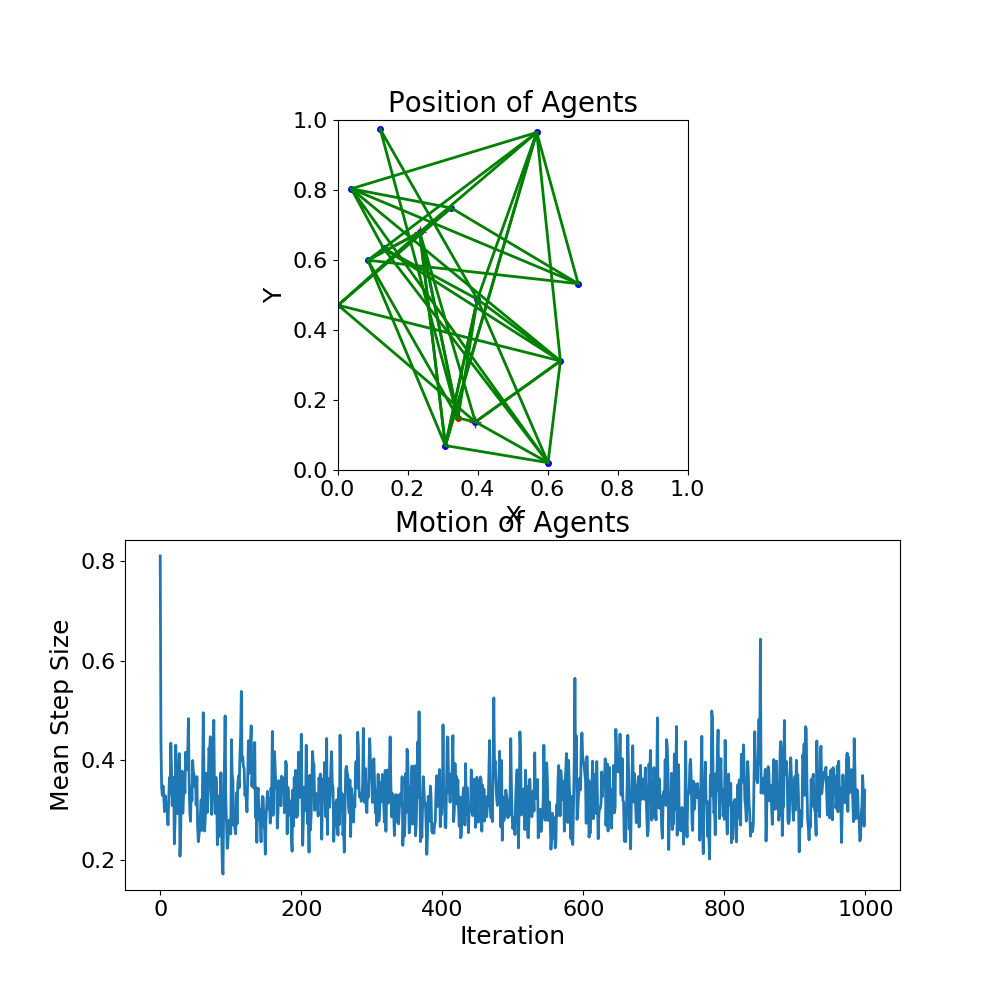

In [11]:
num_agents = 15
max_iterations = 1000
plot_convergence = True
direct_jump = True 

X,Y,mean_step,converged_at = run_new_simulation(num_agents,max_iterations,direct_jump,plot_trajectories,plot_convergence)

* Note that this does not converge. Therefore, I will try the following approach instead and do more extensive convergence tests.

### Version 2: Baby Steps

* In this version, each agent takes a small step at each iteration toward their desired point (one of the points that would form an equilateral triangle with their attractors). This means that the system behaves much more smoothly and stabilizes better than version 1.


* **Selection scheme (same as above)**: Out of the points that would form an equilateral triangle with the agent and her attractors that also lie **in bounds**, take the one **closest** to the agent's present position. If neither lies in bounds, then the agent **doesn't move** at this iteration.

In [12]:
def find_SxSy(Rx,Ry,Xi,Yi,stepSize):
    R_vect = np.array([Rx-Xi,Ry-Yi])
    Rx_vect = np.array([Rx-Xi,0])
    Ry_vect = np.array([0,Ry-Yi])
    
    # Make stepSize a percentage of R_vect:
    projSx = stepSize*np.dot(Rx_vect,R_vect)/(np.linalg.norm(Rx_vect)+eps)
    projSy = stepSize*np.dot(Ry_vect,R_vect)/(np.linalg.norm(Ry_vect)+eps)
    
    S_vect = np.sign(R_vect)*np.array([projSx,projSy])
    return (S_vect.item(0),S_vect.item(1))

In [13]:
def update_positions_small_step(X, Y, iteration, firstAttractor, secondAttractor,stepSize):
    """
       Speed should be determined by how close you are to your desired triangle. 
       If very far, use close to max step size. If very close, use close to min step size.
       For Now, everyone take same step size.
    """
    if stepSize > 1:
        raise Exception('The step size should be less than 1')

    for person in range(X.shape[0]):
        
        # Find the points where you want to go to complete the triangle
        P=(X.item((firstAttractor.item(person),iteration)),Y.item(firstAttractor.item(person),iteration))
        Q=(X.item((secondAttractor.item(person),iteration)),Y.item(secondAttractor.item(person),iteration))
        
        Rx, Ry = find_third_vertex(P,Q)
    
        # For now, just don't update position if both are out of bounds 
        out_of_bounds = (Rx > X_MAX) | (Rx < X_MIN) | (Ry > Y_MAX) | (Ry < Y_MIN)

        Rx=Rx[~out_of_bounds]
        Ry=Ry[~out_of_bounds]
        
        Xi=X[person,iteration]
        Yi=Y[person,iteration]
        
        # Update the next position
        if len(Rx) > 1:
            # Find the closest of the two vertices to your current position
            D1=((Rx[0]-X[person,iteration])**2+(Ry[0]-Y[person,iteration])**2)**0.5
            D2=((Rx[1]-X[person,iteration])**2+(Ry[1]-Y[person,iteration])**2)**0.5
            ind = np.argmin([D1, D2])

            Sx,Sy = find_SxSy(Rx.item(ind),Ry.item(ind),Xi,Yi,stepSize)
            X[person,iteration+1]=Xi+Sx
            Y[person,iteration+1]=Yi+Sy
        elif len(Rx)==1:
            Sx,Sy = find_SxSy(Rx.item(0),Ry.item(0),Xi,Yi,stepSize)
            X[person,iteration+1]=Xi+Sx
            Y[person,iteration+1]=Yi+Sy
        else: #Don't move
            X[person,iteration+1]=Xi
            Y[person,iteration+1]=Yi

    return (X,Y)

<IPython.core.display.Javascript object>


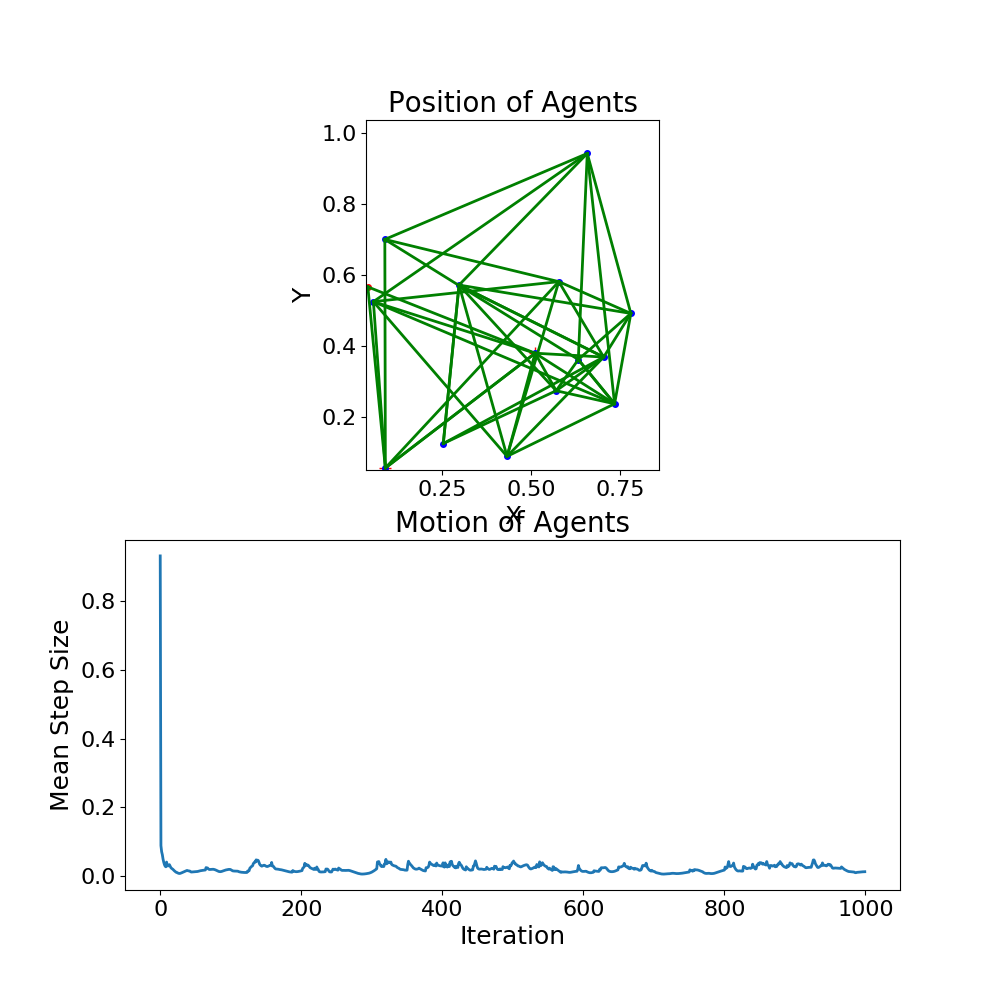

In [14]:
num_agents = 15
max_iterations = 1000
plot_convergence = True
direct_jump = False # The new approach

X,Y,mean_step,converged_at = run_new_simulation(num_agents,max_iterations,direct_jump,plot_trajectories,plot_convergence)

#### Now test for convergence for different numbers of agents

In [16]:
max_iterations = 1000 
direct_jump = False
num_sims_per_trial = 100

mean_step = []
converged_at = []
agents = []

for num_agents in range(3,51):
    print("...Simulations for {} agents...".format(num_agents))
    for sim in range(0,num_sims_per_trial):
        # No Plots
        X,Y,ms,ca = run_new_simulation(num_agents,max_iterations,direct_jump,False,False)
        mean_step.append(ms[-1])
        converged_at.append(ca)
        agents.append(num_agents)

data = list(zip(agents,mean_step,converged_at))
sim_record = pd.DataFrame(data,columns=['Number of Agents','Mean Step Size at Last Iteration','Converged at Iteration'])

sim_record.head()

...Simulations for 3 agents...
...Simulations for 4 agents...


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


...Simulations for 5 agents...
...Simulations for 6 agents...
...Simulations for 7 agents...
...Simulations for 8 agents...
...Simulations for 9 agents...
...Simulations for 10 agents...
...Simulations for 11 agents...
...Simulations for 12 agents...
...Simulations for 13 agents...
...Simulations for 14 agents...
...Simulations for 15 agents...
...Simulations for 16 agents...
...Simulations for 17 agents...
...Simulations for 18 agents...
...Simulations for 19 agents...
...Simulations for 20 agents...
...Simulations for 21 agents...
...Simulations for 22 agents...
...Simulations for 23 agents...
...Simulations for 24 agents...
...Simulations for 25 agents...
...Simulations for 26 agents...
...Simulations for 27 agents...
...Simulations for 28 agents...
...Simulations for 29 agents...
...Simulations for 30 agents...
...Simulations for 31 agents...
...Simulations for 32 agents...
...Simulations for 33 agents...
...Simulations for 34 agents...
...Simulations for 35 agents...
...Simulation

,Number of Agents,Mean Step Size at Last Iteration,Converged at Iteration
0,3,0.0,109.0
1,3,0.0,106.0
2,3,0.0,109.0
3,3,0.0,107.0
4,3,0.0,107.0


In [17]:
with open('Runs.csv','w+') as fs:
    sim_record.to_csv(fs, index=False)

<IPython.core.display.Javascript object>


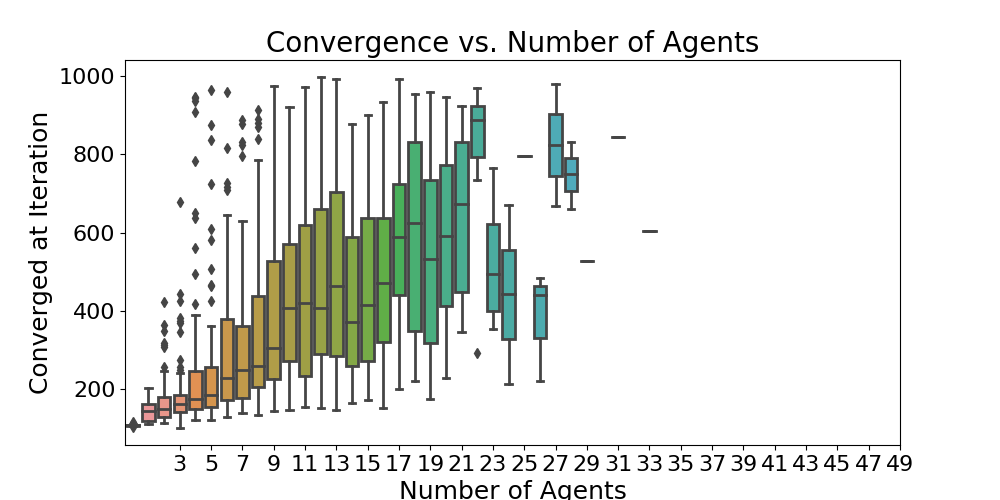

In [18]:
plt.rcParams['figure.figsize'] = (10, 5)
fig1 = plt.subplots() 

sns.boxplot(x="Number of Agents", y="Converged at Iteration", data=sim_record)
xt = plt.xticks(np.arange(min(sim_record['Number of Agents']), max(sim_record['Number of Agents'])+1, 2),np.arange(min(sim_record['Number of Agents']), max(sim_record['Number of Agents'])+1, 2))
plt.title('Convergence vs. Number of Agents')

<IPython.core.display.Javascript object>


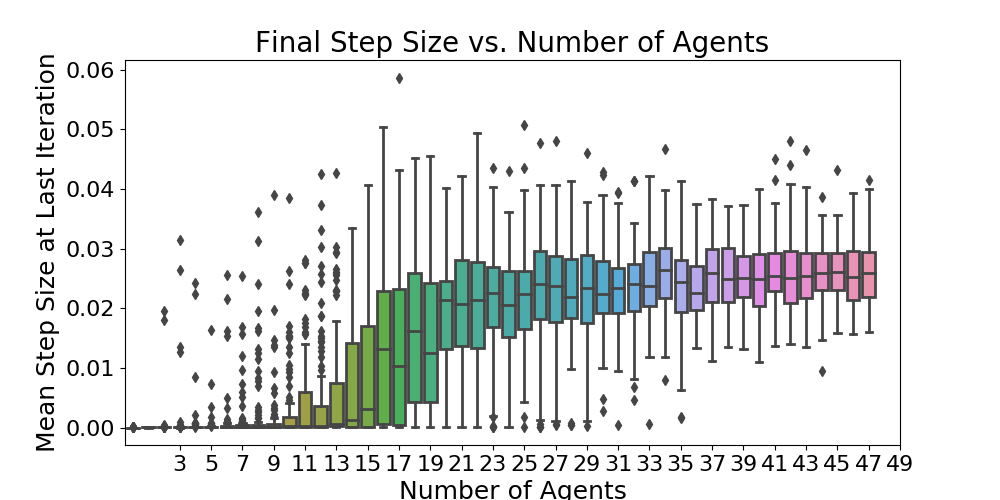

In [19]:
fig2 = plt.subplots() 
ax = sns.boxplot(x="Number of Agents", y="Mean Step Size at Last Iteration", data=sim_record)
xt = plt.xticks(np.arange(min(sim_record['Number of Agents']), max(sim_record['Number of Agents'])+1, 2),np.arange(min(sim_record['Number of Agents']), max(sim_record['Number of Agents'])+1, 2))
plt.title('Final Step Size vs. Number of Agents')

### Observations & Conclusions:

* TBA
* To-Do: Would like to plot final configurations of the runs that converged in a composite figure- they are very interesting. 
* Make the simulations dynamically runnable from github

### Tests

In [103]:
def create_suite():
    test_suite = unittest.TestSuite()
    loader = unittest.defaultTestLoader

    test_suite.addTest(loader.loadTestsFromTestCase(TestUpdatePositions))
    test_suite.addTest(loader.loadTestsFromTestCase(TestInitializeTargets))
    test_suite.addTest(loader.loadTestsFromTestCase(TestThirdVertexFunction))
  
    return test_suite

class TestThirdVertexFunction(unittest.TestCase):

    def test_example_values(self):
        Rx,Ry = find_third_vertex((-0.5,0),(0.5,0))        
        self.assertAlmostEqual(Rx[0],  0)
        self.assertAlmostEqual(Rx[1],  0)
        self.assertAlmostEqual(min(Ry),-(1-0.5**2)**0.5)
        self.assertAlmostEqual(max(Ry),(1-0.5**2)**0.5)

    def test_two_identical_points(self):
        Rx,Ry = find_third_vertex((0.5,0.5),(0.5,0.5))
        self.assertAlmostEqual(Rx[0],0.5)
        self.assertAlmostEqual(Rx[1],0.5)
        self.assertAlmostEqual(Ry[0],0.5)
        self.assertAlmostEqual(Ry[1],0.5)

        Rx,Ry = find_third_vertex((0,0),(0,0))     
        self.assertAlmostEqual(Rx[0],0)
        self.assertAlmostEqual(Rx[1],0)
        self.assertAlmostEqual(Ry[0],0)
        self.assertAlmostEqual(Ry[1],0)

class TestInitializeTargets(unittest.TestCase):
        
    def test_first_is_not_second_choice(self):
        num_agents=20
        firstChoice, secondChoice = initialize_attractors(num_agents)
        self.assertTrue(np.all(abs(firstChoice-secondChoice)>0))
        
    def test_choices_are_not_self_referential(self):
        num_agents=200
        firstChoice, secondChoice = initialize_attractors(num_agents)
        self.assertTrue(np.all(abs(firstChoice.T-np.arange(num_agents))>0))
        self.assertTrue(np.all(abs(secondChoice.T-np.arange(num_agents))>0))

    def test_min_num_agents(self):
        num_agents=3
        firstChoice, secondChoice = initialize_attractors(num_agents)
        # Test that for each agent, it picks the other two.
        self.assertTrue(np.any(abs(np.array([firstChoice[0],secondChoice[0]])-1) == 0))
        self.assertTrue(np.any(abs(np.array([firstChoice[0],secondChoice[0]])-2) == 0))
        self.assertTrue(np.any(abs(np.array([firstChoice[1],secondChoice[1]])-0) == 0))
        self.assertTrue(np.any(abs(np.array([firstChoice[1],secondChoice[1]])-2) == 0))
        self.assertTrue(np.any(abs(np.array([firstChoice[2],secondChoice[2]])-0) == 0))
        self.assertTrue(np.any(abs(np.array([firstChoice[2],secondChoice[2]])-1) == 0))
    
    def test_too_few_agents(self):
        # Test raises exception if num_agents < 3
        with self.assertRaises(Exception): initialize_attractors(1)
    

class TestUpdatePositions(unittest.TestCase):
    
    def test_find_Sx_Sy(self):
        # Tests the function that finds 
        Sx, Sy = find_SxSy(13,9,2,7,0.2)
        self.assertAlmostEqual(Sx,2.2)
        self.assertAlmostEqual(Sy,0.4)

    def test_all_in_bounds_direct_jump(self):
        num_agents = 10
        num_iterations = 100 # One step
        X, Y = initialize_positions(num_agents,num_iterations)
        firstTarget, secondTarget = initialize_attractors(num_agents)
        
        for iteration in range(num_iterations):
            self.assertTrue(np.all(X[:,iteration] <= X_MAX))
            self.assertTrue(np.all(X[:,iteration] >= X_MIN))
            self.assertTrue(np.all(Y[:,iteration] <= Y_MAX))
            self.assertTrue(np.all(Y[:,iteration] >= Y_MIN))
           
            self.assertFalse(np.any(np.isnan(X[:,iteration])))
            self.assertFalse(np.any(np.isinf(X[:,iteration])))
            self.assertFalse(np.any(np.isnan(Y[:,iteration])))
            self.assertFalse(np.any(np.isinf(Y[:,iteration])))
            
            X, Y = update_positions_direct_jump(X, Y, iteration, firstTarget, secondTarget)

    def test_all_in_bounds_small_step(self):
        num_agents = 10
        num_iterations = 100 
        stepSize = 0.1
        X, Y = initialize_positions(num_agents,num_iterations)
        firstTarget, secondTarget = initialize_attractors(num_agents)
        
        for iteration in range(num_iterations):
            self.assertTrue(np.all(X[:,iteration] <= X_MAX))
            self.assertTrue(np.all(X[:,iteration] >= X_MIN))
            self.assertTrue(np.all(Y[:,iteration] <= Y_MAX))
            self.assertTrue(np.all(Y[:,iteration] >= Y_MIN))
           
            self.assertFalse(np.any(np.isnan(X[:,iteration])))
            self.assertFalse(np.any(np.isinf(X[:,iteration])))
            self.assertFalse(np.any(np.isnan(Y[:,iteration])))
            self.assertFalse(np.any(np.isinf(Y[:,iteration])))
            
            X, Y = update_positions_small_step(X, Y, iteration, firstTarget, secondTarget,stepSize)

    """
    Need to work on defining this test:    
    def test_choose_closest(self):
        num_agents = 3 # Min
        num_iterations = 1 # One step
        X, Y = initializePositions(num_agents,num_iterations)
        firstTarget, secondTarget = initializeTargets(num_agents)
        
        X, Y = updatePositionsDirectJump(X, Y, 0, firstTarget, secondTarget)
        
        # Third person, initial position
        #presentPosition = np.hstack((X[2,0],Y[2,0]))
        
        # These are the options for the third person:
        Rx, Ry = findThirdVertex((X.item(0),Y.item(0)),(X.item(1),Y.item(1)))
        
        print(((X[2,0]-Rx)**2+(Y[2,0]-Ry)**2)**0.5)
        #ind = np.argmin([np.dot(presentPosition, np.hstack((Rx[0],Ry[0]))), np.dot(presentPosition, np.hstack((Rx[1],Ry[1])))])

        # Third Person, where they actually moved:
        #X[2,1]
        #self.assertTrue()"""
        

# These need to be added somehow
if __name__ == '__main__':
    #unittest.main() only for command line
    #suite = unittest.TestLoader().loadTestsFromTestCase(TestThirdVertexFunction)

    unittest.TextTestRunner().run(create_suite())

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
.........
----------------------------------------------------------------------
Ran 9 tests in 0.576s

OK
